In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy
import statistics as st
from statsmodels.distributions.empirical_distribution import ECDF

#1#
T=[]
n = 1000
for k in range(10000):
  X = np.random.uniform(0, 1, n)
  X=np.sort(X)
  m=0
  for i in range(n):
    m += ((2*i-1)/(2*n) - X[i])**2
  m+=1/(12*n)
  T.append(m)
print(T)


[0.0661106965158901, 0.1461025230404791, 0.12046694090464523, 0.20494744190415945, 0.056340232195895304, 0.2582407891508052, 0.049367471169375204, 0.11987580298798328, 0.0998534877137151, 0.14554575582313345, 0.11925334129840551, 0.13417125531348606, 0.15698403817592363, 0.17445927985533294, 0.28098756357074545, 0.06223531750964718, 0.059705147265032274, 0.08968098710313066, 0.08162423152473038, 0.04051162744841818, 0.05441935757361059, 0.20325085820017738, 0.05906346752850176, 0.12384693853167984, 0.09168668235142428, 0.143916421544857, 0.047335944836722384, 0.047409001021629746, 0.04665768166847151, 0.047164336424191475, 0.09825967320940593, 0.36492938169945166, 0.061487838855994875, 0.14948026803160053, 0.06948594760986428, 0.12272476267005358, 0.07762001545079279, 0.043656881544337556, 0.05724309926100937, 0.05387653902309778, 0.04753152030355822, 0.4618644871360747, 0.1418644385297713, 0.07094803407169695, 0.07634623783157946, 0.09096804653427185, 0.09181964343696523, 0.0932575598

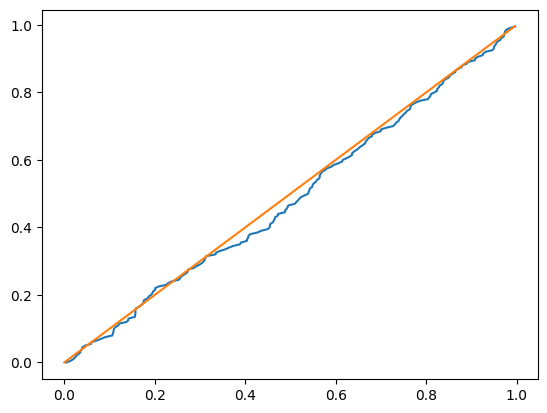

In [ ]:
S=[]
ST=[]
for k in range(200):
  Y = np.random.normal(0, 1, n)
  Y=np.sort(Y)
  m=0
  for i in range(n):
    m += ((2*i-1)/(2*n) - ss.norm.cdf(Y[i], 0, 1))**2
  m+=1/(12*n)
  S.append(m)
r=0
for i in range(len(S)):
  for j in range(len(T)):
    if(S[i]>T[j]):
      r=r+1
  ST.append(r/len(T))
  r=0

ST=np.sort(ST)
ax=np.arange(0, 1, 1/len(S))
plt.plot(ST, ax)
plt.plot(ax, ax)

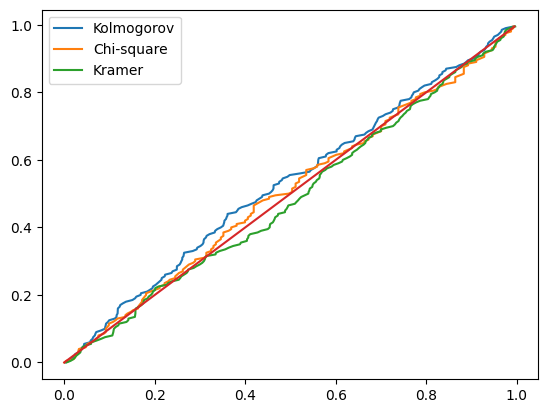

In [ ]:
#2# Normal(0,1)
n = 200
T_k = []
#Kolm
ST_k=[]
Buf=[]
for i in range(n):
  X = np.random.normal(0, 1, n)
  X=np.sort(X)
  for j in range(n):
    Buf.append(max((j/n - ss.norm.cdf(X[j])),(ss.norm.cdf(X[j])-(j-1)/n)))
  T_k.append(np.sqrt(n)*max(Buf))
  Buf.clear()
for i in range(len(T_k)):
 ST_k.append(1-ss.kstwobign.cdf(T_k[i]))
ST_k=np.sort(ST_k)
ax= np.arange(0,1, 1/len(ST_k))
plt.plot(ST_k, ax)

#chi
T_chi=[]
#k=int(math.log(n,2))
k=int(n**(1/5))
S=0
#nu = [0]*k
#for r in range(n):
  #X = np.random.normal(0, 1, n)
  #for i in range(n):
   # d = (max(X)-min(X))/k
   # for j in range(k):
     # if min(X)+j*d<X[i] and X[i]<min(X)+(j+1)*d:
     #   nu[j]+=1
  #for l in range(k):
  #  P = ss.norm.cdf(min(X)+(l+1)*d, 0, 1) - ss.norm.cdf(min(X)+l*d, 0, 1)
  #  S = S + ((nu[l]-n*P)**2)/(n*P)
  #T_chi.append(S)
  #S=0
 # nu=[0]*k
ST_chi=[]

#for i in range(len(T_chi)):
  #ST_chi.append(1-ss.chi.cdf(T_chi[i], k-1))
#ST_chi=np.sort(ST_chi)
#plt.plot(ST_chi, ax)

temp = []
for r in range(n):
  X = np.random.normal(0, 1, n)
  X = np.sort(X)
  u=0
  z=0
  for j in range(k+2):
    u+=z
    z=0
    while(X[z+u]<ss.norm.ppf(float((j+1)/(k+2))) and (z+u)<=n-2):
      z+=1
    temp.append(float(z))
  res = ss.chisquare(temp)
  ST_chi.append(res.pvalue)
  temp = []
ST_chi=np.sort(ST_chi)
plt.plot(ST_chi, ax)

plt.plot(ST, ax)
plt.plot(ax, ax)
plt.legend (('Kolmogorov', 'Chi-square', 'Kramer'))


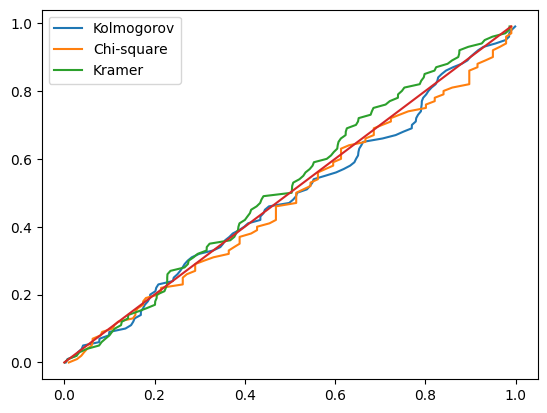

In [ ]:
#2# mix
p = 1
n = 100
T_k = []
#Kolm
ST_k=[]
Buf=[]
for i in range(n):
  X=[]
  for z in range(n):
    if np.random.binomial(1, p)==1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  X=np.sort(X)
  for j in range(n):
    Buf.append(max(j/n - (ss.norm.cdf(X[j], 0, 1)),(ss.norm.cdf(X[j], 0, 1)-(j-1)/n)))
  T_k.append(np.sqrt(n)*max(Buf))
  Buf.clear()
for i in range(len(T_k)):
 ST_k.append(1-ss.kstwobign.cdf(T_k[i]))
ST_k=np.sort(ST_k)
ax= np.arange(0,1, 1/len(ST_k))

#Chi
T_chi=[]
#k=int(math.log(n,2))
k=int(n**(1/5))
#S=0
#nu = [0]*k
#for r in range(n):
 # X=[]
 # for z in range(n):
 #   if np.random.binomial(1, p)==1 :
  #    X.append(np.random.normal(0, 1))
 #   else:
 #     X.append(np.random.normal(0, 3))
 # for i in range(n):
 #   d = (max(X)-min(X))/k
 #   for j in range(k):
 #     if min(X)+j*d<X[i] and X[i]<min(X)+(j+1)*d:
 #       nu[j]+=1
 # for l in range(k):
 #   P = (p*(ss.norm.cdf(min(X)+(l+1)*d, 0, 1))+(1-p)*(ss.norm.cdf(min(X)+(l+1)*d, 0, 3))) - (p*(ss.norm.cdf(min(X)+l*d, 0, 1))+(1-p)*(ss.norm.cdf(min(X)+l*d, 0, 3)))
 #   S = S + ((nu[l]-n*P)**2)/(n*P)
 # T_chi.append(S)
 # S=0
 # nu=[0]*k
ST_chi=[]
#for i in range(len(T_chi)):
#  ST_chi.append(1-ss.chi.cdf(T_chi[i], k-1))
#ST_chi=np.sort(ST_chi)

temp = []
for r in range(n):
  X=[]
  for z in range(n):
    if np.random.binomial(1, p)==1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  X = np.sort(X)
  u=0
  z=0
  for j in range(k+2):
    u+=z
    z=0
    while(X[z+u]<ss.norm.ppf(float((j+1)/(k+2)), loc = 0, scale = 1) and (z+u)<=n-2):
      z+=1
    temp.append(float(z))
  res = ss.chisquare(temp)
  ST_chi.append(res.pvalue)
  temp = []
ST_chi=np.sort(ST_chi)


#Kramer
S=[]
ST=[]
for k in range(n):
  Y = []
  for z in range(n):
    if np.random.binomial(1, p)==1 :
      Y.append(np.random.normal(0, 1))
    else:
      Y.append(np.random.normal(0, 3))
  Y=np.sort(Y)
  m=0
  for i in range(n):
    m += ((2*i-1)/(2*n) - ((ss.norm.cdf(Y[i], 0, 1))))**2
  m+=1/(12*n)
  S.append(m)
r=0
for i in range(len(S)):
  for j in range(len(T)):
    if(S[i]<T[j]):
      r=r+1
  ST.append(r/len(T))
  r=0
ST=np.sort(ST)

print(k)

plt.plot(ST_k, ax)
plt.plot(ST_chi, ax)
plt.plot(ST, ax)
plt.plot(ax, ax)
plt.legend (('Kolmogorov', 'Chi-square', 'Kramer'))


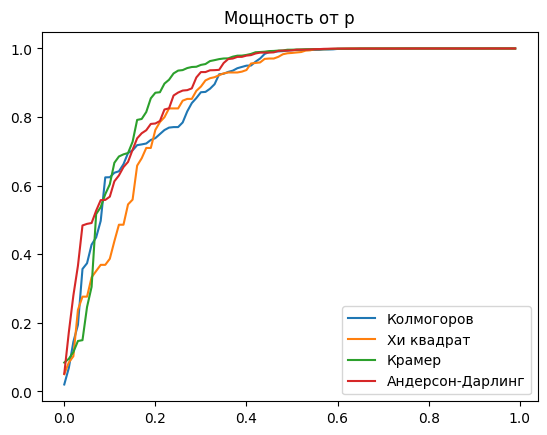

In [ ]:
#3*#
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

n = 100
k=int(n**(1/5))

def power_kolm(p):
  X=[]
  Buf = []
  for j in range(n):
    if np.random.binomial(1, p) == 1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  X=np.sort(X)
  for j in range(n):
    Buf.append(max(j/n - (ss.norm.cdf(X[j], 0, 1)),(ss.norm.cdf(X[j], 0, 1)-(j-1)/n)))
  T_k = np.sqrt(n)*max(Buf)
  return ss.kstwobign.cdf(T_k)

def power_chi(p):
  X=[]
  temp = []
  for j in range(n):
    if np.random.binomial(1, p) == 1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  u=0
  z=0
  X = np.sort(X)
  for j in range(k+2):
    u+=z
    z=0
    while(X[z+u]<ss.norm.ppf(float((j+1)/(k+2)), loc = 0, scale = 1) and (z+u)<=n-2):
      z+=1
    temp.append(float(z))
  res = ss.chisquare(temp)
  p_value =  1 - res.pvalue
  return p_value

def power_kramer(p):
  X = []
  r=0
  m=0
  for z in range(n):
    if np.random.binomial(1, p)==1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  X=np.sort(X)
  for i in range(n):
    m += ((2*i-1)/(2*n) - ((ss.norm.cdf(X[i], 0, 1))))**2
  m+=1/(12*n)
  for i in range(len(T)):
    if(m>T[i]):
      r=r+1
  return r/len(T)

def power_ad(p):
  X = []
  r=0
  m=0
  for z in range(n):
    if np.random.binomial(1, p)==1 :
      X.append(np.random.normal(0, 1))
    else:
      X.append(np.random.normal(0, 3))
  X=np.sort(X)
  for i in range(n):
    m += ((2*i-1)/(2*n) - ((ss.norm.cdf(X[i], 0, 1))))**2
  m+=1/(12*n)
  for i in range(len(T)):
    if(m>T[i]):
      r=r+1
  return r/len(T)

p = np.arange(0, 1, 0.01)
p_kolm = []
p_chi = []
p_kramer = []
p_ad = []
for i in range(len(p)):
  p_kolm.append(power_kolm(p[i]))
  p_chi.append(power_chi(p[i]))
  p_kramer.append(power_kramer(p[i]))
  p_ad.append(power_ad(p[i]))
p_kolm = np.sort(p_kolm)
p_chi = np.sort(p_chi)
p_kramer = np.sort(p_kramer)
p_ad = np.sort(p_ad)
plt.title("Мощность от p")
plt.plot(p, p_kolm)
plt.plot(p, p_chi)
plt.plot(p, p_kramer)
plt.plot(p, p_ad)
plt.legend(('Колмогоров', 'Хи квадрат', 'Крамер', 'Андерсон-Дарлинг'))